## Final Project Submission

Please fill out:
* Student name: Clyde Ochieng
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge 
* Blog post URL:


# MICROSOFT MOVIE STUDIO EXPLORATION AND DATA ANALYSIS

## 1. Business Understanding

### a) Introduction 
Microsoft is venturing into the entertainment industry by establishing a new movie studio to create original video content. The company recognizes the success of big players in the industry and aims to capitalize on this trend. However, lacking experience in movie production, Microsoft needs insights into the current landscape of successful films at the box office. The goal is to inform strategic decisions regarding the types of films that will resonate well with audiences and maximize profitability.

### b) Problem Statement
Microsoft wants to succeed in the entertainment sector by navigating the complexities of the movie studio business by launching a new venture that will produce original video content that will appeal to viewers and yield maximum profit. Microsoft understands the necessity to learn about the present world of box office-performing films, as it has no past expertise in film creation. The strategic decisions the studio needs to make about the kinds of movies it should make to attract viewers and survive in the cutthroat industry depend heavily on this information.

### c) Main Objective
To empower Microsoft's new movie studio with actionable insights into the dynamics of the film industry, particularly focusing on box office performance by leveraging data analysis and exploration techniques using pandas, where the goal is to identify the key factors contributing to the success of movies, including genres, talented writers, directors, and popularity metrics.

### d) Specific Objectives

1. To explore Box Office Performance by analysing historical data on movies, focusing on key metrics such as total gross, average rating, and number of votes to understand box office performance.

2. Translate insights into recommendations by Providing actionable recommendations for Microsoft's movie studio, suggesting specific genres, writers, directors, and popularity metrics to consider for future movie productions.

3. Position for success by strategically positioning the new movie studio to create content that not only achieves financial success but also resonates with a diverse audience, fostering long-term growth and success in the entertainment market. 


### e) Experimental Design
1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Conclusions and Recommendations


### f) Data Understanding 
The data used in this project are data collected from:
1. https://www.boxofficemojo.com/
2. https://www.imdb.com/
3. https://www.rottentomatoes.com/
4. https://www.themoviedb.org/
5. https://www.the-numbers.com/

The imdb dataset contained 8 tables:
|No.| Table    |
|---| ---       |
|1|movie_basics|
|2|directors|
|3|known_for|
|4|movie_akas|
|5|movie_ratings|
|6|persons|
|7|principals|
|8|writers|

### 1. Collecting And Importing relevant Modules

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

## 2.Reading and Checking the Data 

### a. IMDB Movies

### i)Reading the data

In [107]:
# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')
#import data from rt.movie_info.tsv.gz
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")
#rt.reviews.tsv.gz
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')
#bom.movie_gross.csv.gz
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
#tmdb.movies.csv.gz
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
#tn.movie_budgets.csv.gz
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [108]:
im = os.path.join('im.db')
# Open up a connection
conn = sqlite3.connect(im)
# Initialize a cursor
cursor = conn.cursor()

In [109]:
import pandas as pd
import zipfile
import sqlite3

# Path to the zip file containing the SQLite database
zip_file_path = r'C:\Users\user\Downloads\Moringa\dsc-phase-1-project-v2-4\zippedData\im.db.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one file in the zip, get its name
    file_name_inside_zip = zip_ref.namelist()[0]
    # Extract the file
    zip_ref.extractall(r'C:\Users\user\Downloads\Moringa\dsc-phase-1-project-v2-4\unzippedData')

# Connect to the SQLite database
conn = sqlite3.connect(r'C:\Users\user\Downloads\Moringa\dsc-phase-1-project-v2-4\unzippedData\im.db')
# Viewing the list of tables in the IMDb database
imdb_tables = pd.read_sql("""
SELECT name AS TableNames
FROM sqlite_master
WHERE type='table'
""", conn)

# Print the DataFrame
print(imdb_tables)



      TableNames
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [110]:
#previewing the directors table
q = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
q.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [111]:
#previewing movie_ratings table
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [112]:
#previewing movie_basics table
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [113]:
#previewing the persons table
q3 = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
q3.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


### ii)Merging movie_basics to movie_ratings, directors and persons table.

In [114]:
#joining movie_basics to movie_ratings on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [115]:
#closing the connection to the database
conn.close()

In [116]:
#viewing the bottom of the imdb dataframe
imdb.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181386,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer"


## iii)Calculating the count of entries in the IMDb dataframe

In [117]:
#determining the number of records in the imdb dataframe
imdb.shape

(181387, 13)

In [118]:
#checking the information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


### iv)checking out the stats summary of the IMDb data.

In [119]:
#previewing the summary statistics of imdb 
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year
count,181387.000000,163584.000000,181387.000000,1.813870e+05,54805.000000,1342.000000
mean,2014.309802,97.789484,6.217683,4.955524e+03,1969.097856,2014.908346
std,2.536111,194.434689,1.388026,3.760931e+04,12.499740,4.866581
min,2010.000000,3.000000,1.000000,5.000000e+00,1870.000000,1944.000000
25%,2012.000000,84.000000,5.400000,1.900000e+01,1962.000000,2014.000000
50%,2014.000000,94.000000,6.300000,6.600000e+01,1971.000000,2016.000000
75%,2016.000000,107.000000,7.200000,3.110000e+02,1978.000000,2018.000000
max,2019.000000,51420.000000,10.000000,1.841066e+06,2004.000000,2019.000000


## Observations:
1. There are columns with missing data, these are runtime_minutes, genres, birth_year, death_year and primary_profession.
2. runtime_minutes has a movie that is 51420 minutes and 3 minutes long and the standard deviation is at 194.4.
3. The genres are separated by commas.

### b. Bom_movies 

In [120]:
import pandas as pd

# Assuming you've already loaded the data into 'movie_gross'
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

# Define bom_movies using 'movie_gross'
bom_movies = movie_gross

# Print DataFrame in the specified format with index
bom_movies.head()



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [121]:
import pandas as pd

# Read the CSV file
bom_movies = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

# Print the bottom of the DataFrame in the specified format with index
bom_movies.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [122]:
import pandas as pd

# Read the CSV file
bom_movies = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
#determining the number of records in the bom_movies dataframe
bom_movies.shape

(3387, 5)

In [123]:
import pandas as pd

# Read the CSV file
bom_movies = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

# Print DataFrame information
bom_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [124]:
#previewing the summary statistics of bom_movies
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Observations:
1. bom_movies has the following columns with missing values: domestic_gross and foreign_gross.
2. The foreign_gross column is in string format.



### c. Rt_movies

In [125]:
import pandas as pd

# Read the CSV files
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Display the top of the movie_info DataFrame
movie_info.head()



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [126]:
import pandas as pd

# Read the CSV files
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Display the bottom of the movie_info DataFrame
movie_info.tail()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [127]:
import pandas as pd

# Read the CSV files
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Determine the number of records in the movie_info DataFrame
movie_info.shape



(1560, 12)

In [128]:
import pandas as pd

# Read the CSV files
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Print information about the reviews DataFrame
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Observations:
1. The columns review,rating and critic have missing values
2. rt_reviews can be merged with rt_movies on id as they are from the same source.
3. There are multiple reviews per movie.
4. The rating column appears to be out of 5.


### 3.Clean the data 

### a) Data Cleaning
This section deals with data cleaning methods that prepares the data for exploratory analysis. It tackles the problems with the datasets that have been observed while exploring them and any other that occur afterwards. It addresses the following:
   - Duplicated rows
   - Missing values
   - Unwanted observations
   - Structural issues
   - Outliers
   - Invalid data
   - Merges
   
### i) Duplicate Rows
It is helpful to define a function that checks for duplicate rows in all the dataframes.   

In [129]:
#defining a function checking for number of duplicated rows
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print (f"There are {duplicates} duplicated rows")

In [130]:
#checking for duplicates in imdb dataframe
check_duplicates(imdb)

There are 95357 duplicated rows


In [131]:
#checking for duplicates in bom_movies dataframe
check_duplicates(bom_movies)

There are 0 duplicated rows


In [132]:



# Load the movie_info DataFrame from the specified file
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')
# Check for duplicates in the reviews DataFrame
print("Duplicates in reviews DataFrame:")
check_duplicates(reviews)




Duplicates in reviews DataFrame:
There are 9 duplicated rows


In [133]:
import pandas as pd

# Define the check_duplicates function
def check_duplicates(df):
    duplicates = df[df.duplicated()]
    if duplicates.empty:
        print("No duplicates found.")
    else:
        print("Duplicates found:")
        print(duplicates)

# Load the reviews DataFrame from the specified file
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')

# Load the movie_info DataFrame from the specified file
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Check for duplicates in the movie_info DataFrame
check_duplicates(movie_info)


No duplicates found.


In [134]:
import pandas as pd

# Load the rt_reviews DataFrame from the specified file
rt_reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep="\t", encoding='unicode_escape')

# Drop duplicates in the rt_reviews DataFrame
rt_reviews.drop_duplicates(inplace=True)

# Now, you can proceed with your further operations using rt_reviews DataFrame.


In [135]:
#confirming that duplicates have been dropped 
check_duplicates(imdb)
check_duplicates(rt_reviews)

Duplicates found:
         movie_id               primary_title              original_title  \
1       tt0063540                   Sunghursh                   Sunghursh   
2       tt0063540                   Sunghursh                   Sunghursh   
3       tt0063540                   Sunghursh                   Sunghursh   
6       tt0069049  The Other Side of the Wind  The Other Side of the Wind   
9       tt0100275    The Wandering Soap Opera       La Telenovela Errante   
...           ...                         ...                         ...   
181376  tt9911774   Padmavyuhathile Abhimanyu   Padmavyuhathile Abhimanyu   
181379  tt9913084            Diabolik sono io            Diabolik sono io   
181381  tt9914286           Sokagin Çocuklari           Sokagin Çocuklari   
181383  tt9914642                   Albatross                   Albatross   
181385  tt9914942  La vida sense la Sara Amat  La vida sense la Sara Amat   

        start_year  runtime_minutes                genres

### ii)  Missing Values
The dataframes have columns with missing values. The next step is to create a fuction that returns the percentage of missing values in each column.

In [136]:
#defining a function that prints the percentage of null rows in all columns 
def find_percentage_of_nulls(df):
    
    #loop through all columns and print percentage of missing values in each
    
    for column in df.columns:
        percentage = round(df[column].isnull().sum()/(len(df))*100,3)
        print(f"The percentage of null rows in column {column} is {percentage}%")   

 1. The studio column and the domestic_gross column only have 0.827% and 0.148% missing values. It makes sense to drop the rows as they will not affect the data analysis.

 2. The foreign_gross column has almost 40% of the data being null. As it is in string format, the missing values can be replaced with 

In [137]:
#dropping null rows in studio and domestic_gross column
bom_movies.dropna(inplace = True, subset = ['studio','domestic_gross'])

In [138]:
#replace missing values with 0 in foreign_gross column
bom_movies.foreign_gross.fillna('0',inplace = True)

In [139]:
#confirming there are no missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


### rt_movies

In [144]:
import pandas as pd

# Load the rt_movies DataFrame from the specified file
rt_movies = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep="\t")

# Define the function to find the percentage of null values
def find_percentage_of_nulls(df):
    # Calculate the percentage of null values in each column
    null_percentage = df.isnull().mean() * 100
    
    # Print the result for each column
    for column, percentage in null_percentage.items():
        print(f"The percentage of null rows in column {column} is {percentage:.3f}%")

# Call the function to find the percentage of null values in rt_movies
find_percentage_of_nulls(rt_movies)




The percentage of null rows in column id is 0.000%
The percentage of null rows in column synopsis is 3.974%
The percentage of null rows in column rating is 0.192%
The percentage of null rows in column genre is 0.513%
The percentage of null rows in column director is 12.756%
The percentage of null rows in column writer is 28.782%
The percentage of null rows in column theater_date is 23.013%
The percentage of null rows in column dvd_date is 23.013%
The percentage of null rows in column currency is 78.205%
The percentage of null rows in column box_office is 78.205%
The percentage of null rows in column runtime is 1.923%
The percentage of null rows in column studio is 68.333%


### observations 
- The following columns have a large percentage of null values : currency, box_office and studio. The best way to proceed is by dropping these columns. Columns synopsis, director, writer, theater_date, dvd_date are to be dropped as they are not required for this analysis.
- The columns rating, genre, runtime have a small number of null values. These will be handled by dropping the rows.

In [145]:
#dropping columns with too many null values
rt_movies.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

In [146]:
#dropping rows with null values
rt_movies.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [147]:
#confirming there are no missing values
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1526 non-null   int64 
 1   rating   1526 non-null   object
 2   genre    1526 non-null   object
 3   runtime  1526 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


### rt_reviews

In [148]:
#checking for percentage of null values in each column
find_percentage_of_nulls(rt_reviews)

The percentage of null rows in column id is 0.000%
The percentage of null rows in column review is 10.209%
The percentage of null rows in column rating is 24.835%
The percentage of null rows in column fresh is 0.000%
The percentage of null rows in column critic is 4.985%
The percentage of null rows in column top_critic is 0.000%
The percentage of null rows in column publisher is 0.568%
The percentage of null rows in column date is 0.000%



Removing rows from the columns review, critic, and publisher should be adequate since there will still be a sufficient number of entries for analysis. Delving deeper into the rating column will facilitate making a more informed decision.

In [149]:
#checking the unique values in the rating column
rt_reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

Given the apparent inconsistency in the rating system within this column, it seems prudent to drop the column altogether as attempting to group or analyze the ratings further may prove challenging.

In [150]:
#dropping rating column
rt_reviews.drop('rating',axis=1,inplace=True)

In [151]:
#dropping rows with null values
rt_reviews.dropna(inplace = True)

In [152]:
#confirming there are no missing values
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46662 entries, 0 to 54427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          46662 non-null  int64 
 1   review      46662 non-null  object
 2   fresh       46662 non-null  object
 3   critic      46662 non-null  object
 4   top_critic  46662 non-null  int64 
 5   publisher   46662 non-null  object
 6   date        46662 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


### iii)Structural Issues
The dataframes imdb and rt_movies have structural issues. Their genre columns are separated by commas and pipes respectively. This will be dealt with by splitting the columns on their specific delimiters using the `.split()` method then, using the `.explode()` method, transformed into separate rows retaining all other column values. This will increase the number of rows.

**a. imdb movies**

In [153]:
imdb = imdb.assign(genres=imdb.genres.str.split(',')).explode('genres')

In [154]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"


### rt_movies

In [155]:
rt_movies = rt_movies.assign(genre=rt_movies.genre.str.split('|')).explode('genre')

In [156]:
rt_movies.head()

,id,rating,genre,runtime
0,1,R,Action and Adventure,104 minutes
0,1,R,Classics,104 minutes
0,1,R,Drama,104 minutes
1,3,R,Drama,108 minutes
1,3,R,Science Fiction and Fantasy,108 minutes


### iv)Outliers
The IMDb dataframe contains a movie with a duration of 51,420 minutes, which heavily distorts the data. This anomaly is evident in the boxplot below:

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


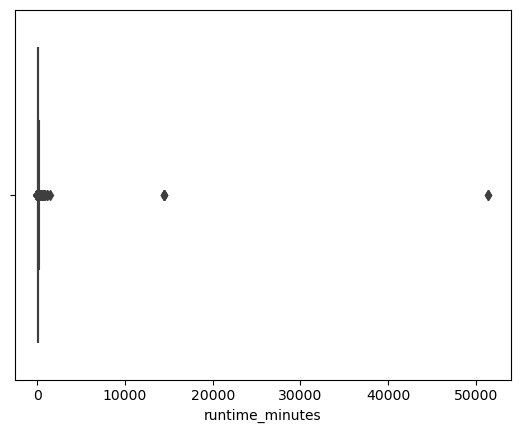

In [157]:
sns.boxplot(data = imdb, x = 'runtime_minutes');

In [158]:
#selecting the rows with the outliers
imdb.loc[(imdb.runtime_minutes > 200) | (imdb.runtime_minutes < 30)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
143,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6,nm0104888,Carsten Brandt,NaN,NaN,"actor,director,writer"
1701,tt10243660,A Tale of Two Kitchens,A Tale of Two Kitchens,2019,29.0,Documentary,6.7,104,nm1970269,Trisha Ziff,NaN,NaN,"producer,director,writer"
1705,tt10244756,Ang hupa,Ang hupa,2019,276.0,Sci-Fi,7.2,5,nm0225010,Lav Diaz,1958.0,NaN,"writer,director,editor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Biography,8.2,9372,nm0000217,Martin Scorsese,1942.0,NaN,"producer,director,actor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Documentary,8.2,9372,nm0000217,Martin Scorsese,1942.0,NaN,"producer,director,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179676,tt9318514,Reason,Vivek,2018,261.0,Documentary,9.0,44,nm0666674,Anand Patwardhan,1950.0,NaN,"director,editor,producer"
180302,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632,nm0715371,Dan Reed,1964.0,NaN,"director,producer,writer"
180784,tt9749570,Heimat Is a Space in Time,Heimat ist ein Raum aus Zeit,2019,218.0,Documentary,7.8,14,nm0374656,Thomas Heise,1955.0,NaN,"director,writer,producer"
181098,tt9865446,Siege,Siege,2019,16.0,Sci-Fi,8.5,32,nm10490240,Deeptanshu Sinha,NaN,NaN,"director,writer,art_department"


In [159]:
#dropping the outliers
imdb = imdb.loc[(imdb.runtime_minutes <= 200) & (imdb.runtime_minutes >= 30)]

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


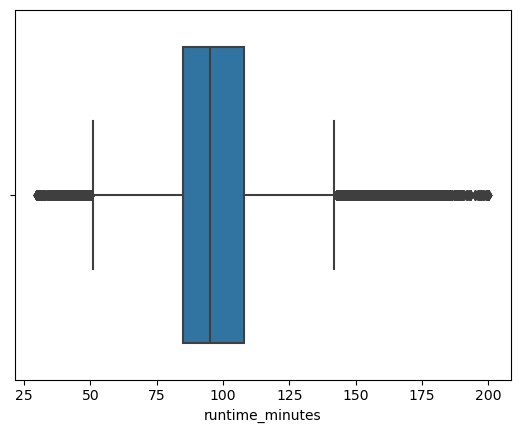

In [160]:
#previewing the new boxplot
sns.boxplot(data = imdb, x = 'runtime_minutes');

### v)Invalid Data
bom_movies and rt_movies dataframes have columns with the wrong datatypes.

### bom_movies

The "foreign_gross" column is currently stored as a string format. To conduct numeric operations, it must be converted to float format.operations.

In [161]:
#removing any commas
bom_movies.foreign_gross = bom_movies.foreign_gross.map(lambda x:x.replace(",",""))

In [162]:
#converting to a float
bom_movies.foreign_gross = bom_movies.foreign_gross.astype(float)

### rt_movies


The "runtime" column is currently in string format, with the word "minutes" included. This text will be removed, and the column will be converted to integer format.





In [163]:
#removing minutes
rt_movies.runtime = rt_movies.runtime.str.replace('minutes',"")

In [164]:
#converting to integer
rt_movies.runtime = rt_movies.runtime.astype('int')

### vi)Merges

Both rt_movies and rt_reviews originate from the same source and should be merged based on the common column id.

In [165]:
#merging the two dataframes
rt_merged = rt_reviews.merge(rt_movies, how = 'inner',on = 'id')

In [166]:
#previewing the new dataframe
rt_merged.head()

,id,review,fresh,critic,top_critic,publisher,date,rating,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108
1,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108
2,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama,108
3,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Science Fiction and Fantasy,108
4,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama,108


### 4. ### Analyzing Data and Creating Visualizations

This section focuses on analyzing the data and creating visualizations to answer key business questions and provide recommendations.

1. **Most Popular Genres**:
   - Analyze genre popularity by categorizing movie ratings and sorting by the number of votes, with a threshold of at least 1000 votes for better insights.

2. **Film Ratings of Most Watched Movies**:
   - Examine film ratings for the most-watched movies using data from the IMDb dataframe.

3. **Relationship Between Domestic and Foreign Gross Earnings**:
   - Investigate the correlation between domestic and foreign gross earnings using relevant columns in the IMDb dataframe.

4. **Most Successful Studios**:
   - Identify the most successful studios by analyzing studio-related data in the IMDb dataframe.

5. **Best Directors for the Project**:
   - Determine the best directors for the project by assessing director-related data in the IMDb dataframe.

Insights from the `rt_merged` dataframe will complement the analysis conducted on the IMDb dataframe.


In [167]:
#creating a new column that categorises the average rating into high, average and low
imdb['rating'] = ["High" if ((x >= 6) and (x <= 10)) 
                   else "Low" for x in imdb.averagerating]

In [168]:
#sorting the dataframe by number of votes
imdb.sort_values('numvotes', ascending = False, inplace = True)

In [169]:
#creating a dataframe where number of votes are greater than 1000
imdb1 = imdb.loc[imdb.numvotes > 1000]

In [170]:
#grouping data by genre and rating
genres = imdb1.groupby(['genres','rating'])['movie_id'].count()

In [ ]:
#sorting the dataframe by high ratings
genres = genres.unstack().sort_values('High',ascending = False)[:10]